Three points bending model

input: E, nu, w_max(scalar, acting in the middle of the beam)
output: force and draw force-deflection curve


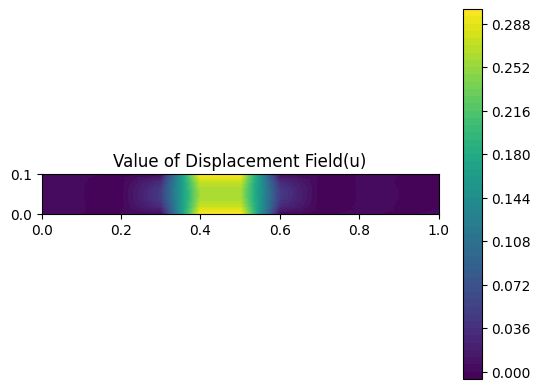

0.012600000000000007

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from firedrake import *
import pandas as pd

def three_point_bending(E, nu, w_max):
    # Create mesh and function space
    length = 1.0  # Length of the beam
    b = 0.05  # Thickness of the beam
    h = 0.1   # Height of the beam
    n = 100  # Number of elements
    nx, ny = 10, 5

    mesh = RectangleMesh(nx, ny, length, h, quadrilateral=True)
    V = FunctionSpace(mesh, "CG", 1)

    # Define trial and test functions
    u = TrialFunction(V)
    v = TestFunction(V)

    # # Plot the mesh
    # fig1, ax1 = plt.subplots()
    # triplot(mesh, axes=ax1)
    # ax1.set_title("Mesh Plot")

    # # Show the plot
    # plt.show()

    x, y = SpatialCoordinate(mesh)
    epsilon = 0.1
    loading_region = And(x >= length/2 - epsilon, x <= length/2 + epsilon)
    w = conditional(loading_region, w_max, 0)

    # Define Dirichlet boundary conditions
    # fixed left and right boundary
    # set w_max in the midddle of the beam
    left_bc = DirichletBC(V, 0.0, 1)
    right_bc = DirichletBC(V, 0.0, 2)
    bottom_bc = DirichletBC(V, w, 3)
    top_bc = DirichletBC(V, w, 4)
    bc = [left_bc, right_bc, bottom_bc, top_bc]

    # Calculate moment of inertia
    I = b * h**3 / 12

    # distributed load
    f = Constant(0.0)
    a = E*I*inner(grad(u), grad(v))*dx
    L = f*v*dx

    # Solve the problem
    u = Function(V)
    solve(a == L, u, bcs=bc)

    fig, axes = plt.subplots()
    axes.set_aspect('equal')
    contours = tricontourf(u, levels=50, axes=axes)
    plt.colorbar(contours)
    plt.title("Value of Displacement Field(u)")
    plt.show()

    # Compute the deflection
    force = 48 * w * E * I / length**3
    s = assemble(.5*force * ds(4))
    force_project = project(force, V)
    # print("Max force = ", s)
    # print("w_max = ", w_max)
    return s

E = Constant(2.1e3)  # Young's modulus in GPa
nu = Constant(0.3)  # Poisson's ratio
w_max = Constant(0.3)  # Maximum deflection in m
three_point_bending(E, nu, w_max)

0.12600000000000003

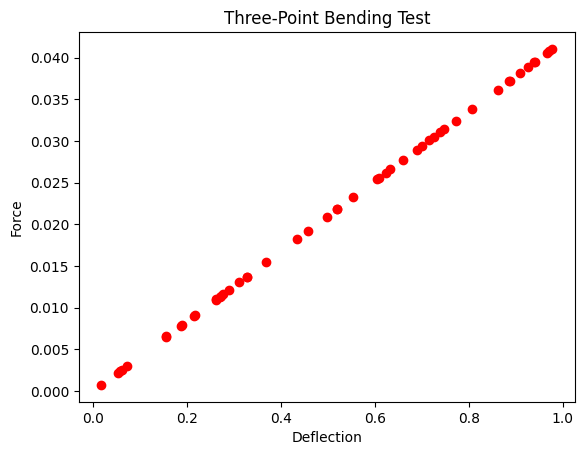

In [12]:
# check
def get_dataset(num_samples, E, nu):
    n = 5  # Number of elements
    mesh = IntervalMesh(n, length)
    V = FunctionSpace(mesh, "CG", 1)
    X, y = [], []
    for _ in range(num_samples):
        w = np.random.rand()
        force = three_point_bending(E, nu, w)
        X.append(w)
        y.append(force)
    return X, y

num_samples = 50
length = 1
E = Constant(2.1e3)  # Young's modulus in GPa
nu = Constant(0.3)  # Poisson's ratio
X, y = get_dataset(num_samples, E, nu)

# Plot the force-deflection curve
plt.plot(X, y, 'ro')
plt.xlabel("Deflection")
plt.ylabel("Force")
plt.title("Three-Point Bending Test")
plt.show()

In [6]:
# check 
length = 1.0  # Length of the beam
b = 0.05  # Thickness of the beam
h = 0.1   # Height of the beam
length = 1
E = 2.1e3  # Young's modulus in GPa
nu = 0.3  # Poisson's ratio

I = b * h**3 / 12
w_max = 0.3967269410099312
force = 48 * w_max * E * I / length**3
force

0.16662531522417115

Max force =  0.016662531522417118
w_max =  0.3967269410099312
Max force =  0.02313875792023649
w_max =  0.5509228076246779
Max force =  0.027564079786423574
w_max =  0.6562876139624656
Max force =  0.014806032732761803
w_max =  0.3525245888752808
Max force =  0.03565381447686461
w_max =  0.8489003446872521